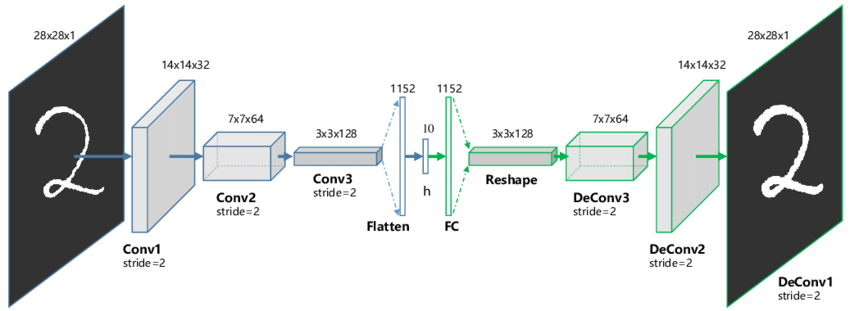

Background:
**Autoencoder** is an unsupervised artificial neural network that learns how to efficiently compress and encode data then learns how to reconstruct the data back from the reduced encoded representation to a representation that is as close to the original input as possible.

Autoencoder, by design, reduces data dimensions by learning how to ignore the noise in the data.
Autoencoder Components:
Autoencoders consists of 4 main parts:

1- Encoder: In which the model learns how to reduce the input dimensions and compress the input data into an encoded representation.

2- Bottleneck: which is the layer that contains the compressed representation of the input data. This is the lowest possible dimensions of the input data.

3- Decoder: In which the model learns how to reconstruct the data from the encoded representation to be as close to the original input as possible.

4- Reconstruction Loss: This is the method that measures measure how well the decoder is performing and how close the output is to the original input.

The training then involves using back propagation in order to minimize the network’s reconstruction loss.

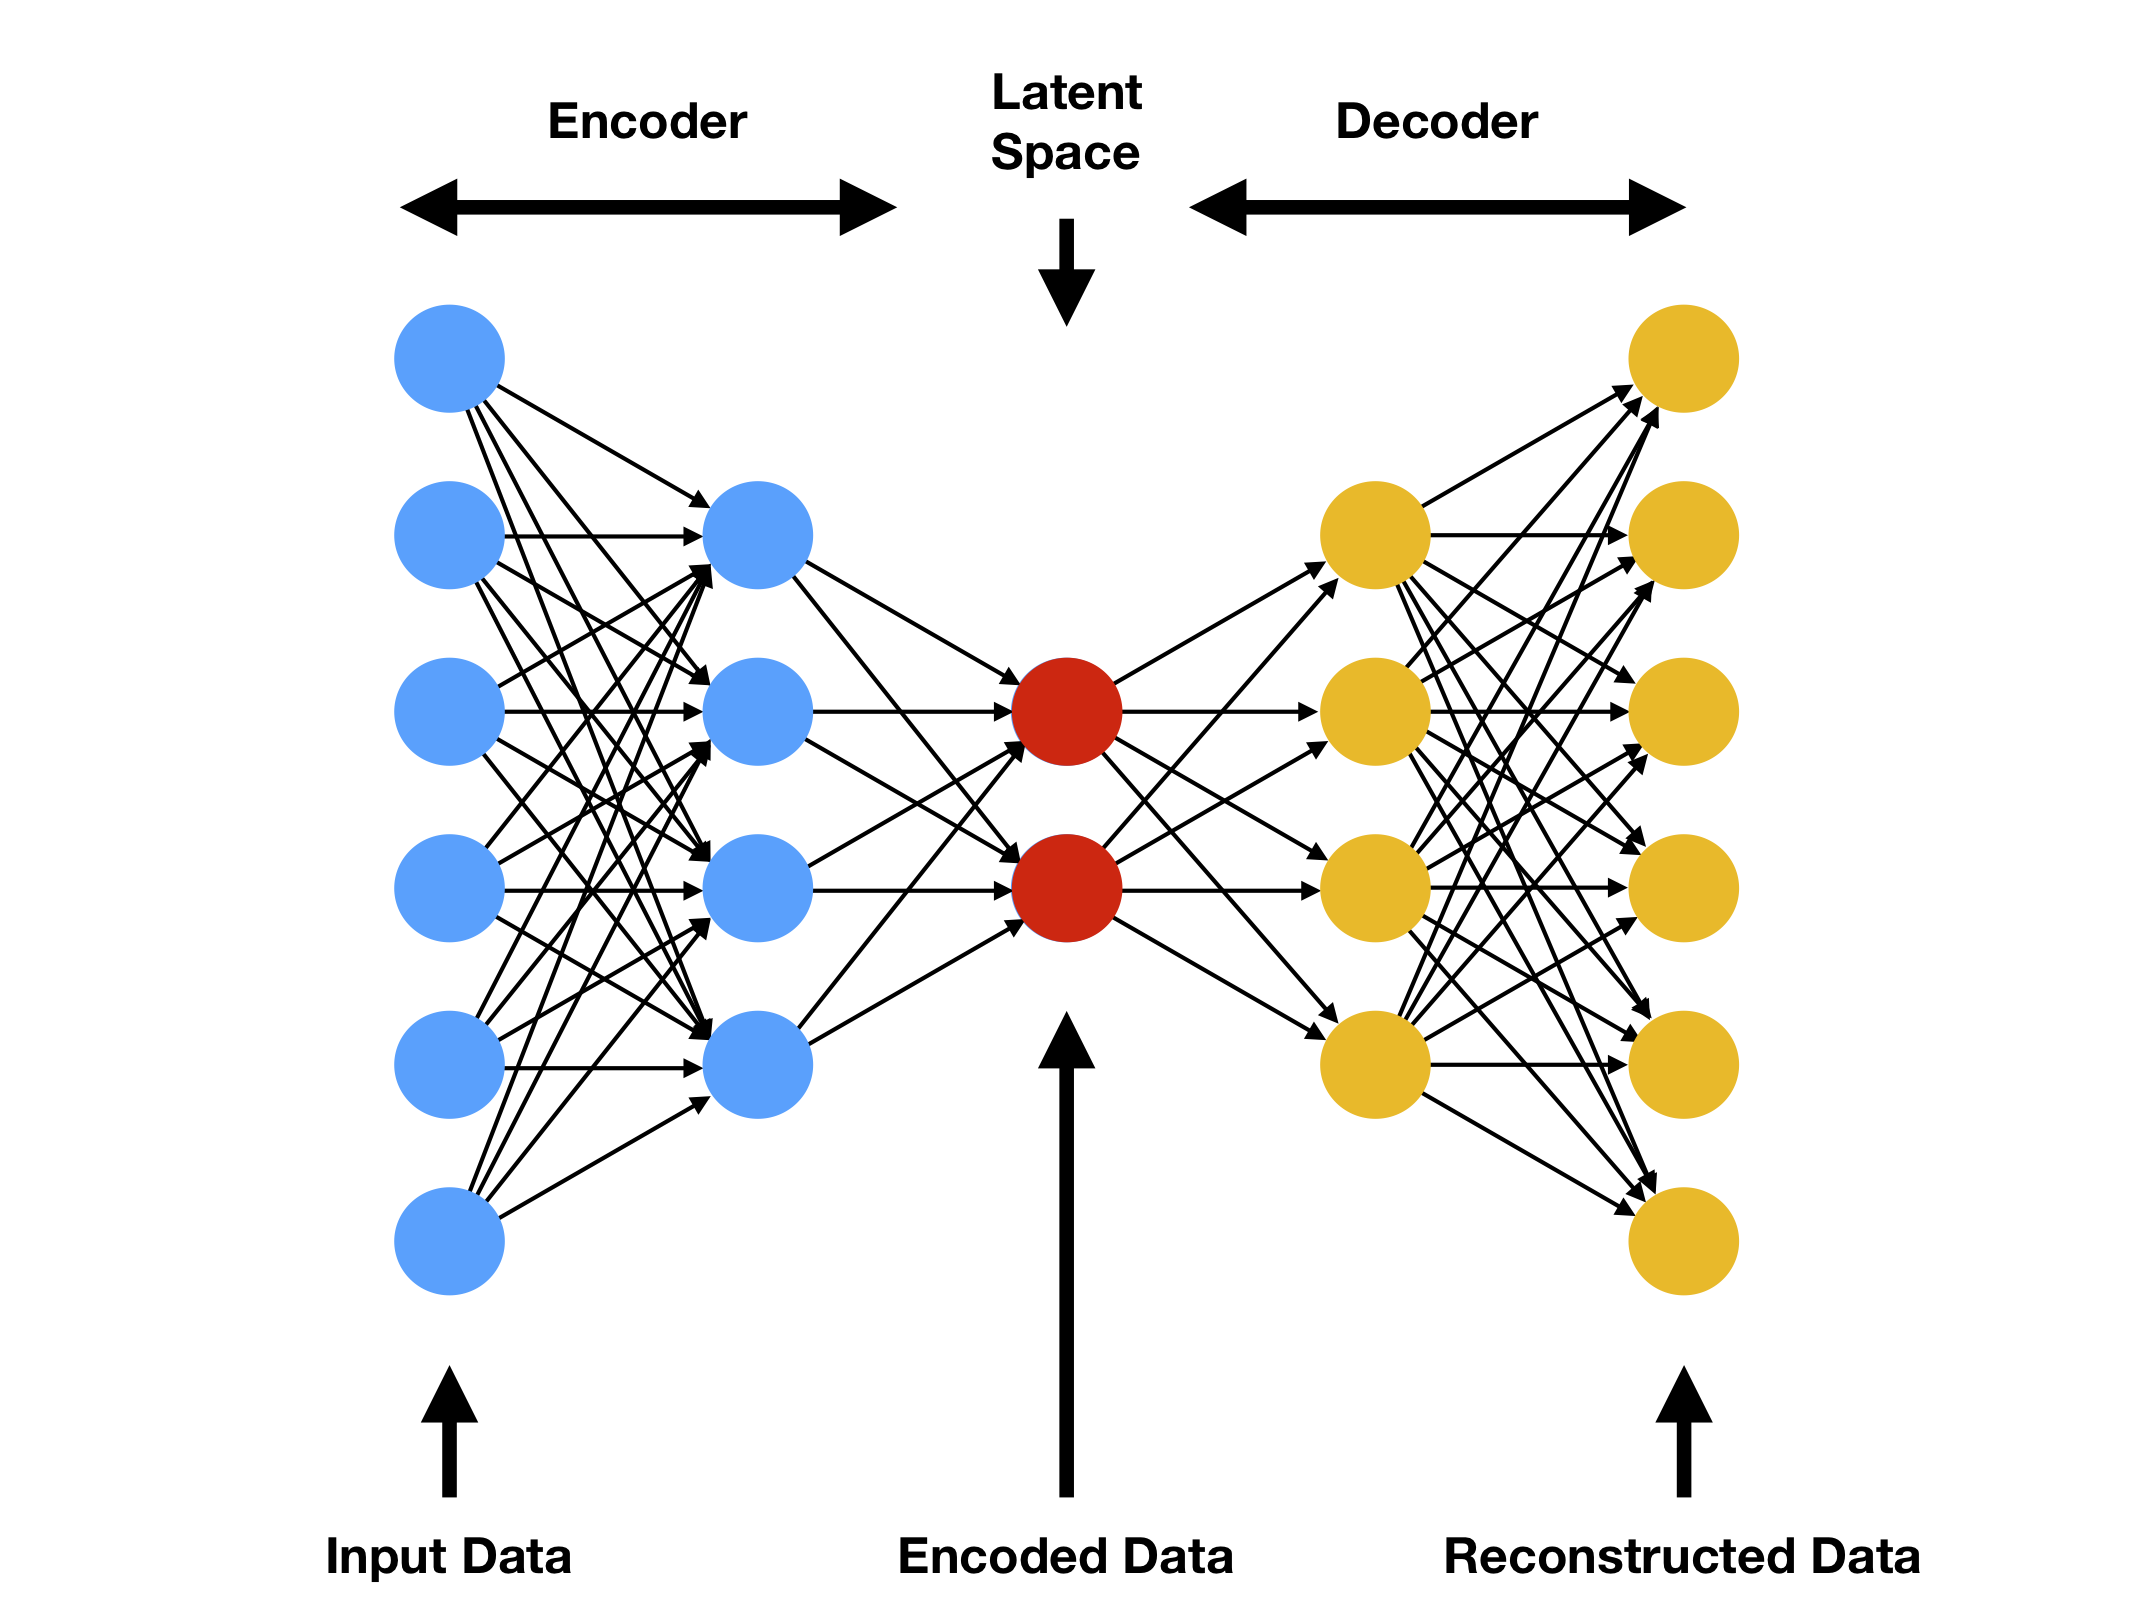

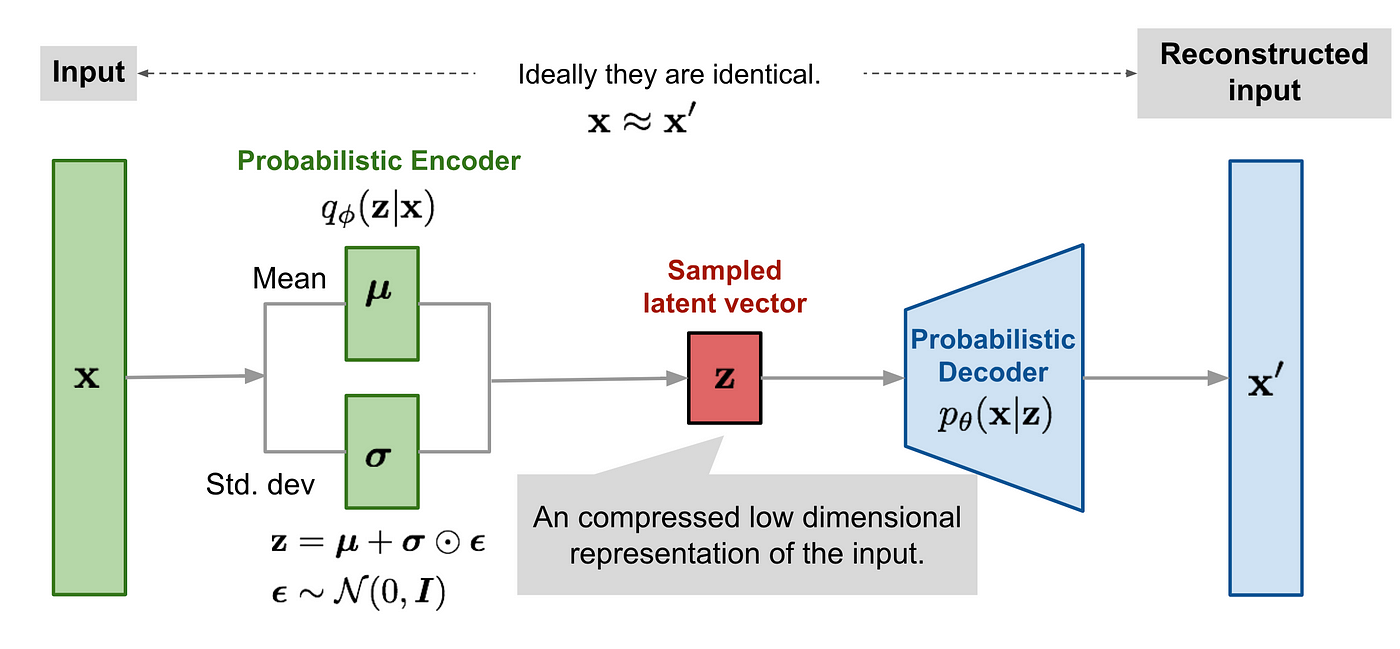

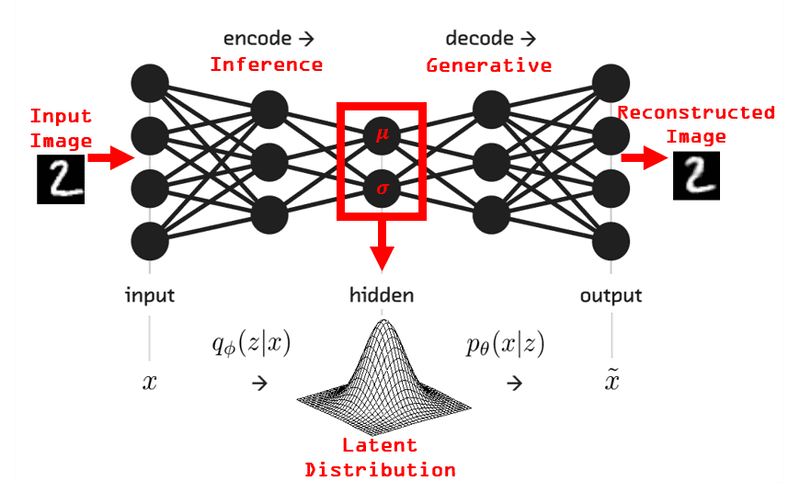

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 4ms/step
7502/10000 [D loss: 0.3681613355875015 | D Accuracy: 85.9375] [G loss: 3.771169662475586]
4/4 [==============================] - 0s 3ms/step
7503/10000 [D loss: 0.2382500022649765 | D Accuracy: 89.84375] [G loss: 4.637326240539551]
4/4 [==============================] - 0s 3ms/step
7504/10000 [D loss: 0.2851196676492691 | D Accuracy: 87.890625] [G loss: 4.0359344482421875]
4/4 [==============================] - 0s 3ms/step
7505/10000 [D loss: 0.3060416877269745 | D Accuracy: 88.28125] [G loss: 3.496695041656494]
4/4 [==============================] - 0s 3ms/step
7506/10000 [D loss: 0.32321904599666595 | D Accuracy: 86.71875] [G loss: 4.593568801879883]
4/4 [==============================] - 0s 2ms/step
7507/10000 [D loss: 0.22238408029079437 | D Accuracy: 91.40625] [G loss: 5.158447265625]
4/4 [==============================] - 0s 4ms/step
7508/10000 [D loss: 0.2389010637998581 | D Acc

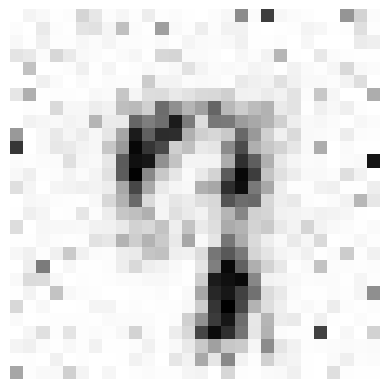

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#Step 1
# Load the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to [-1, 1]
train_images = (train_images - 127.5) / 127.5

#Step 2
def build_generator():
    model = keras.Sequential()
    model.add(Dense(128, activation='relu', input_shape=(100,)))
    model.add(Dense(784, activation='tanh'))
    model.add(Reshape((28, 28)))
    return model


#Step 3
def build_generator():
    model = keras.Sequential()
    model.add(Dense(128, activation='relu', input_shape=(100,)))
    model.add(Dense(784, activation='tanh'))
    model.add(Reshape((28, 28)))
    return model

#Step 4
def build_discriminator():
    model = keras.Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

#Step 5
def build_gan(generator, discriminator):
    model = keras.Sequential()
    # The generator part
    model.add(generator)
    # The discriminator part
    model.add(discriminator)
    return model


#Step 6
# Create the models
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gan = build_gan(generator, discriminator)
discriminator.trainable = False
gan.compile(optimizer='adam', loss='binary_crossentropy')



#Step 6: Train the GAN


def train_gan(gan, discriminator, generator, epochs, batch_size=128):
    # Create labels for the data
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Train on real images
        idx = np.random.randint(0, train_images.shape[0], batch_size)
        real_imgs = train_images[idx]

        # Train on fake images
        noise = np.random.normal(0, 1, (batch_size, 100))
        fake_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, real_labels)

        print(f"{epoch + 1}/{epochs} [D loss: {d_loss[0]} | D Accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

    return generator

trained_generator = train_gan(gan, discriminator, generator, epochs=10000, batch_size=128)




#Step 7: Generate and Display an Image

def display_generated_image(generator):
    noise = np.random.normal(0, 1, (1, 100))
    generated_image = generator.predict(noise)
    plt.imshow(generated_image[0], interpolation='nearest', cmap='gray_r')
    plt.axis('off')
    plt.show()

display_generated_image(trained_generator)

1/1 [==============================] - 0s 33ms/step


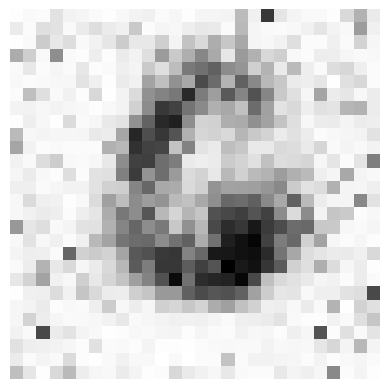

In [ ]:
display_generated_image(trained_generator)

1/1 [==============================] - 0s 25ms/step


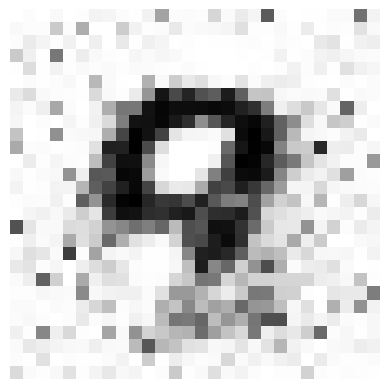

In [ ]:
display_generated_image(trained_generator)

1/1 [==============================] - 0s 23ms/step


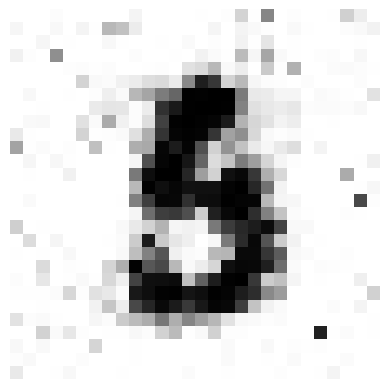

In [ ]:
display_generated_image(trained_generator)